# Machine Learing

## Introduction

The purpose of our analysis was to determine whether a person had heart disease based on certain criteria (chest pain type, cholesterol, fasting blood sugar, exercise induced angina, etc ...).


In order to do so we use a dataset from kaggle. See if we can find any other trends in heart data to predict certain cardiovascular events or find any clear indications of heart health.

##Importing all the needed libraries.


In [1]:
from pandas import read_csv
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
import seaborn as sns
from datetime import datetime as dt
from numpy import arange

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

We choose the heart desease dataset for this project, our attempt will be to determine if someone has a heart disease.

## Download dataset

In [2]:
url = "./cardio_train.csv"
dataset = read_csv(url, delimiter=';')

## General analyis

We display the first tow of the dataset, to see the aspect of each data.

In [3]:
dataset.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


The dataset consist of 13 columns concerning blood analysis.

We check if there is any missing value.

In [4]:
dataset.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

We can see that the dataset is complete.

We display the internal structure of the datasets, to have a better undestanding of the data.

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


We want to see what are the data that are the most correlate to heart diseases.

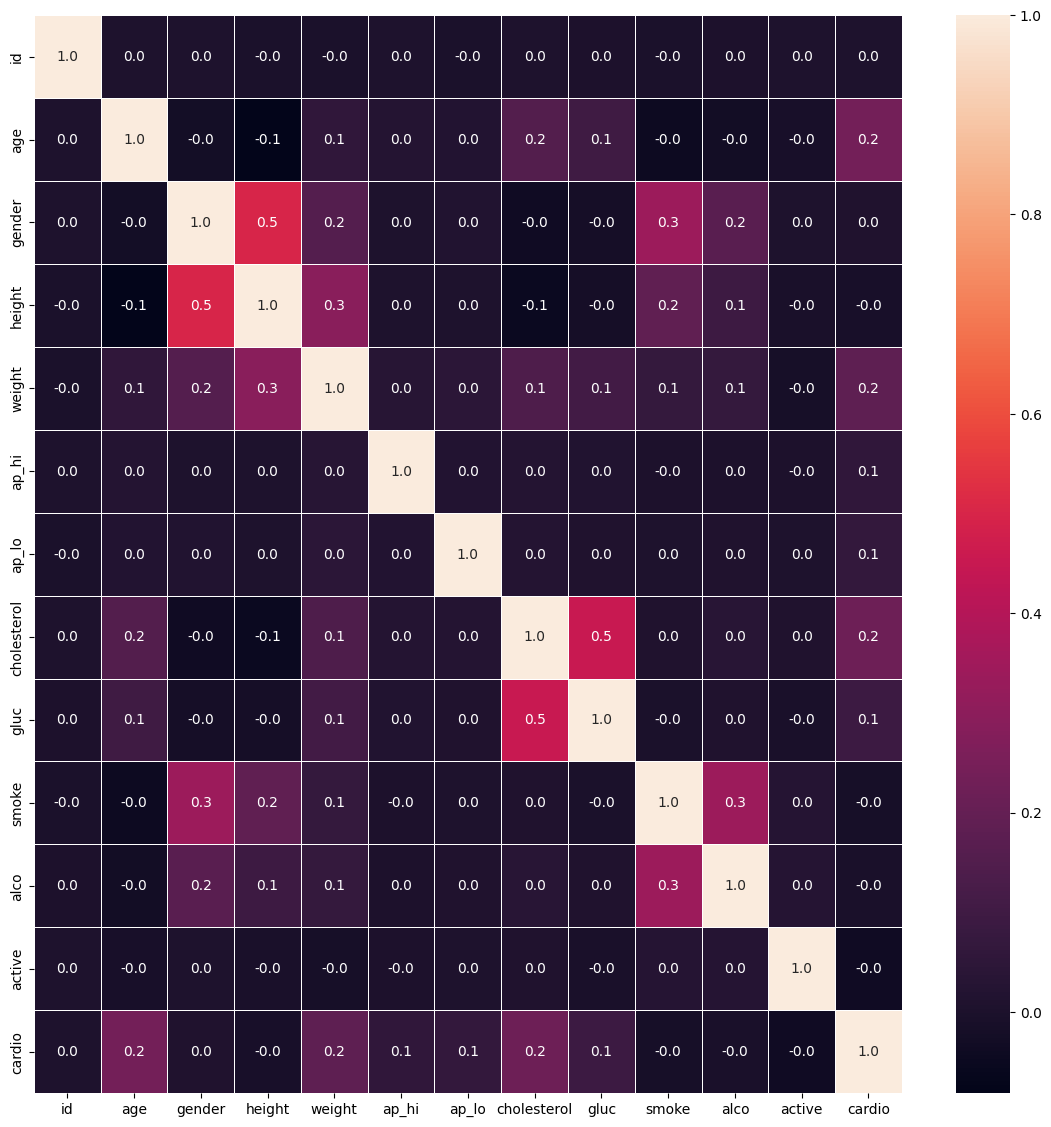

In [6]:
fig, ax = pyplot.subplots(figsize=(14, 14))
sns.heatmap(dataset.corr(), annot=True, linewidths=0.4, fmt='.1f', ax=ax)
pyplot.show()

From this visualization, we can see that age, weight and amount of cholesterol are variables that correlate with having heart diseases.

Systolic and diastolic blood presure and sugars have also a small impact on the chance to have heart diseases.


## Training

First we need to split our dataset into two separate dataset, train and validation.

We will use the train set to train our model, then use the validation one to test our model.

X and Y represente respectively the symptoms and the result, wich is having a heart disease or not.

In [7]:
array = dataset.values
X = array[:,0:-1]
y = array[:,-1]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=2, shuffle=True)

## Choice of algorithm

We compile together all the algorithm we will test to determine the one with the better accuracy.

In [8]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('KNN', KNeighborsClassifier()))

Time to test them all.

In [9]:
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.699232 (0.005580)
LDA: 0.646571 (0.003823)
CART: 0.637143 (0.005570)
NB: 0.549125 (0.009353)
KNN: 0.556571 (0.009213)


For each algorithm, the first number represent the average accuity and the number in parenthesis the standard deviation.

We use some box plot to have a better view of those result.

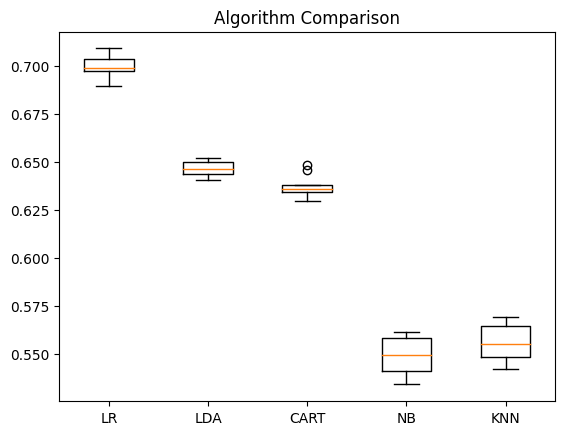

In [10]:
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()

Has we can see, the Logistic Regression(LR) have the best result. We will use this one to train our model.

##Hyperparameter

Before training it, we need to determine the hyperpameter.

We split again the dataset but we wil just keep the 500 first data to gain some time during the tuning.

In [11]:
data = dataset.values
X, y = data[:500, :-1], data[:500, -1]

We load the model we choosed.

In [12]:
model = LogisticRegression()

In [13]:
model.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

The model will be evaluate using a repeated stratified kfold with 10 folds.

In [14]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

Then we define the parameter that will be tested, which are 'solver', 'fit_intercept', 'warm_start' and 'penalty'.

In [20]:
grid = dict()
grid['solver'] = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
grid['fit_intercept'] = [True, False]
grid['warm_start'] = [True, False]
grid['penalty'] = ['l1', 'l2', 'elasticnet', 'none']
grid['multi_class'] = ['auto', 'ovr', 'multinomial']

To do the search we will use a grid search, which is the exhaustive way to doing it

In [21]:
search = GridSearchCV(model, grid, scoring='accuracy', cv=cv, n_jobs=-1)

Then we can see the result of the search

In [22]:
result = search.fit(X, y)
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.7306666666666665
Best Hyperparameters: {'fit_intercept': True, 'multi_class': 'multinomial', 'penalty': 'l2', 'solver': 'newton-cg', 'warm_start': True}


We can see that the best hyperparameter are True for 'fit_intercept' and 'warm_start', l2 for 'penalty', multinomial for 'multi_class' and newton-cg for the 'solver'.

##Training

We will now train the chosen model with the hyperparameter and the training dataset.

In [23]:
model = LogisticRegression(fit_intercept=True, penalty='l2', solver='newton-cg', warm_start=True, multi_class='multinomial')
model.fit(X_train, Y_train)
training = model.predict(X_validation)

And to finish, we print the accuracy score, the confusion matrix and the classification report.

In [19]:
print(accuracy_score(Y_validation, training))
print(confusion_matrix(Y_validation, training))
print(classification_report(Y_validation, training))

0.7250714285714286
[[5432 1597]
 [2252 4719]]
              precision    recall  f1-score   support

         0.0       0.71      0.77      0.74      7029
         1.0       0.75      0.68      0.71      6971

    accuracy                           0.73     14000
   macro avg       0.73      0.72      0.72     14000
weighted avg       0.73      0.73      0.72     14000



##Conclusion

After training the model, it was able to determine correctly the diagnostic of 73% of the patient.
Of 70000 people, 1597 were given a false positive and 2252 a true negative.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=8673562b-a330-4723-a08c-2377fb142e42' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>